In [1]:
import pycaret
from pycaret.classification import *
import pandas as pd
pycaret.__version__


'3.2.0'

In [2]:
train = pd.read_csv("train.tsv", sep="\t", index_col=0) # 学習用データ
test = pd.read_csv("test.tsv", sep="\t", index_col=0)   # 評価用データ
sample_submit = pd.read_csv("sample_submit.tsv", sep="\t", index_col=0, header=None) # 応募用サンプルファイル

In [4]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
873,0,3,male,47.0,0,0,9.0000,S
874,1,2,female,28.0,1,0,24.0000,C
879,1,1,female,56.0,0,1,83.1583,C


In [ ]:
"""
EDA(グラフ・可視化)
"""

In [ ]:
"""
特徴量エンジニアリング書く
"""

In [5]:
#dataには訓練用データフレームを指定
#targetには目的変数を指定、タイタニックコンペの場合はsurvived
#オプションが色々とあるが、setup関数で簡単な欠損値処理と平滑化、CPUのコア使用数、GPUの有効化などを実施可能
exp = setup(data = train, target = 'survived', session_id=1)


,Description,Value
0,Session id,1
1,Target,survived
2,Target type,Binary
3,Original data shape,"(445, 8)"
4,Transformed data shape,"(445, 10)"
5,Transformed train set shape,"(311, 10)"
6,Transformed test set shape,"(134, 10)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,2


In [6]:
#comare_models()でモデルの比較が可能　黄色のものが一番スコアが高かったモデル
best_model = compare_models()
print(best_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7947,0.8540,0.7231,0.7609,0.7363,0.5699,0.5755,1.4770
gbc,Gradient Boosting Classifier,0.7754,0.8429,0.7147,0.7361,0.7187,0.5333,0.5400,0.0100
ridge,Ridge Classifier,0.7753,0.0000,0.6673,0.7559,0.7035,0.5252,0.5327,0.0060
lda,Linear Discriminant Analysis,0.7753,0.8405,0.6673,0.7559,0.7035,0.5252,0.5327,0.0060
ada,Ada Boost Classifier,0.7690,0.7930,0.6821,0.7487,0.7024,0.5155,0.5283,0.0090
lr,Logistic Regression,0.7623,0.8351,0.6840,0.7279,0.6957,0.5039,0.5135,0.1590
rf,Random Forest Classifier,0.7592,0.8418,0.7147,0.7023,0.7031,0.5021,0.5079,0.0300
xgboost,Extreme Gradient Boosting,0.7527,0.8204,0.7212,0.6894,0.6973,0.4906,0.4984,0.0080
lightgbm,Light Gradient Boosting Machine,0.7527,0.8323,0.7224,0.6908,0.7004,0.4921,0.4980,0.4570
dt,Decision Tree Classifier,0.7526,0.7479,0.6821,0.7052,0.6843,0.4838,0.4923,0.0950


In [7]:
#上記で
model = create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6562,0.7490,0.4615,0.6000,0.5217,0.2605,0.2660
1,0.7742,0.8547,0.6923,0.7500,0.7200,0.5313,0.5325
2,0.8710,0.8077,0.7692,0.9091,0.8333,0.7293,0.7360
3,0.7742,0.8376,0.6154,0.8000,0.6957,0.5210,0.5323
4,0.8387,0.9487,0.6923,0.9000,0.7826,0.6578,0.6722
5,0.8065,0.8333,0.7500,0.7500,0.7500,0.5921,0.5921
6,0.8065,0.8202,0.7500,0.7500,0.7500,0.5921,0.5921
7,0.7742,0.8465,0.8333,0.6667,0.7407,0.5451,0.5557
8,0.8387,0.9342,0.8333,0.7692,0.8000,0.6652,0.6667


In [11]:
model = tune_model(gbc)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8287,0.7855,0.3976,0.6911,0.5048,0.4102,0.4331
1,0.8267,0.7767,0.3795,0.6923,0.4903,0.3964,0.4224
2,0.8168,0.7672,0.3494,0.6554,0.4558,0.3577,0.3833
3,0.8128,0.7750,0.3994,0.6157,0.4845,0.3765,0.3896
4,0.8274,0.7835,0.3514,0.7222,0.4727,0.3839,0.4196
5,0.8155,0.7895,0.3483,0.6517,0.4540,0.3551,0.3803
6,0.8135,0.7802,0.3453,0.6425,0.4492,0.3490,0.3734
7,0.8267,0.7766,0.3874,0.6898,0.4962,0.4013,0.4257
8,0.8313,0.7868,0.3964,0.7097,0.5087,0.4166,0.4423


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#以下、プロット
#たくさんあるけど混合行列と寄与度とAUCくらいしか使わないよ

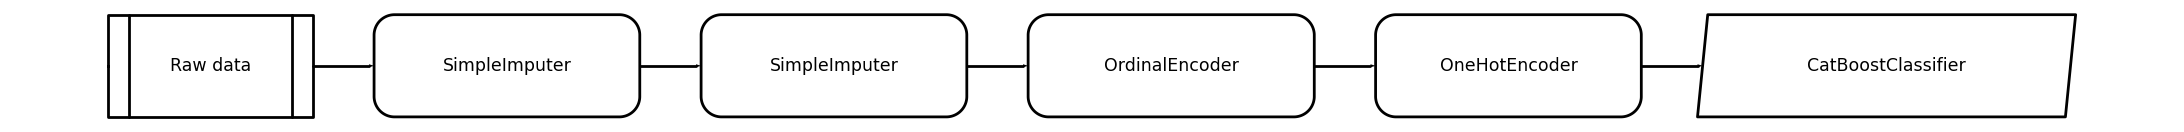

In [8]:
# 各種プロットの生成
plot_model(model, plot='pipeline')         # 前処理パイプライン





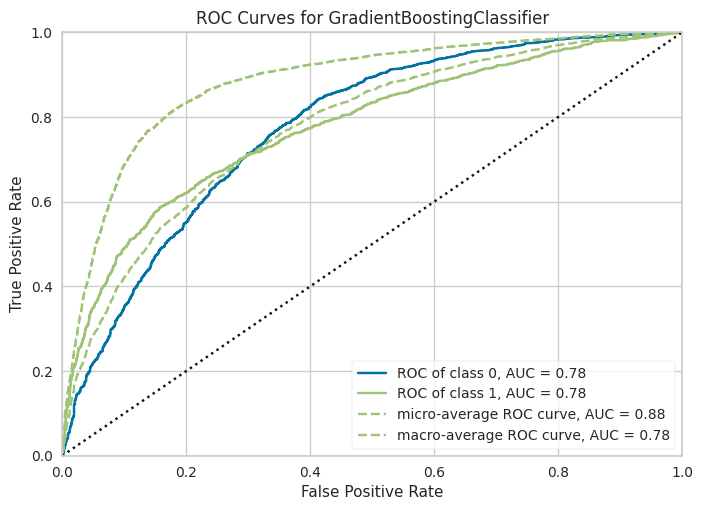

In [25]:
plot_model(model, plot='auc')              # AUCカーブ


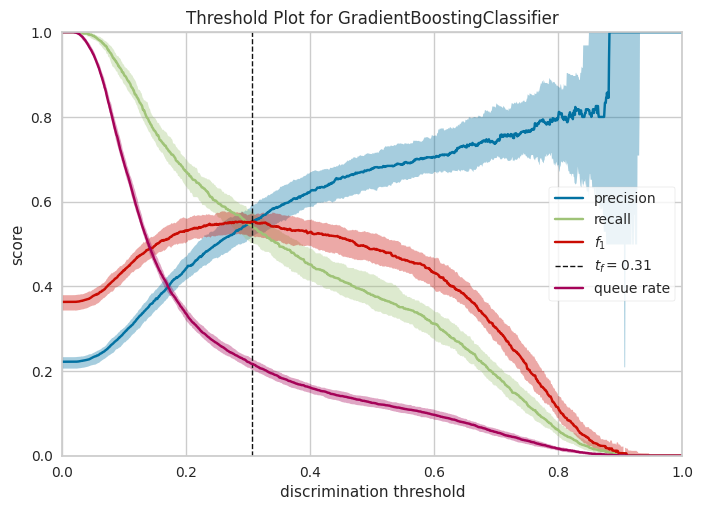

In [27]:
plot_model(model, plot='threshold')        # ディスクリミネーション閾値

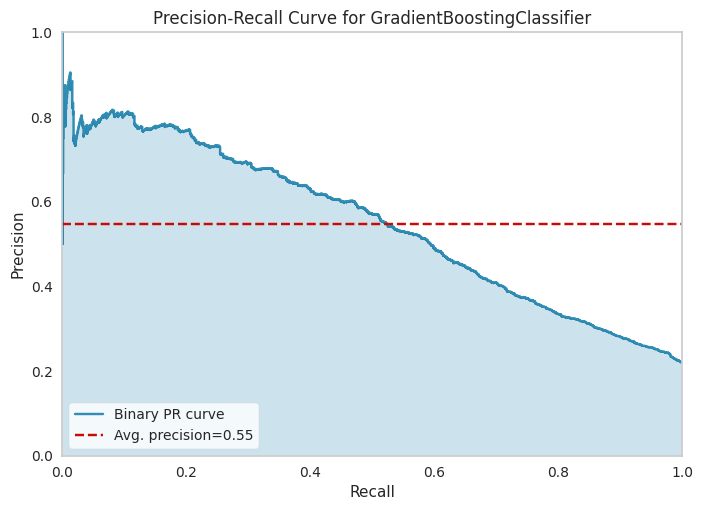

In [28]:
plot_model(model, plot='pr')               # 精度-再現率カーブ

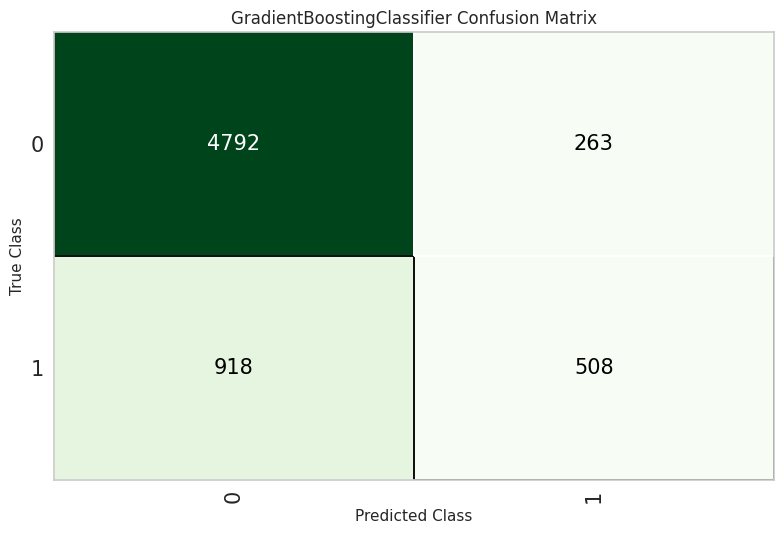

In [29]:
plot_model(model, plot='confusion_matrix') # 混同行列


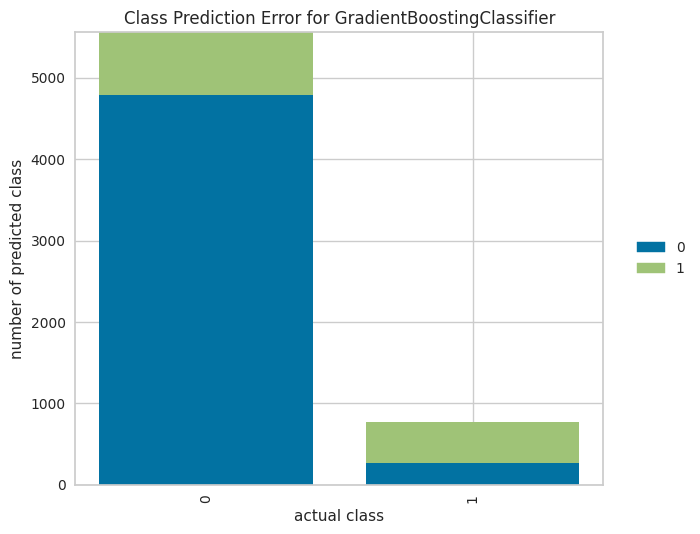

In [30]:
plot_model(model, plot='error')            # クラス予測エラー


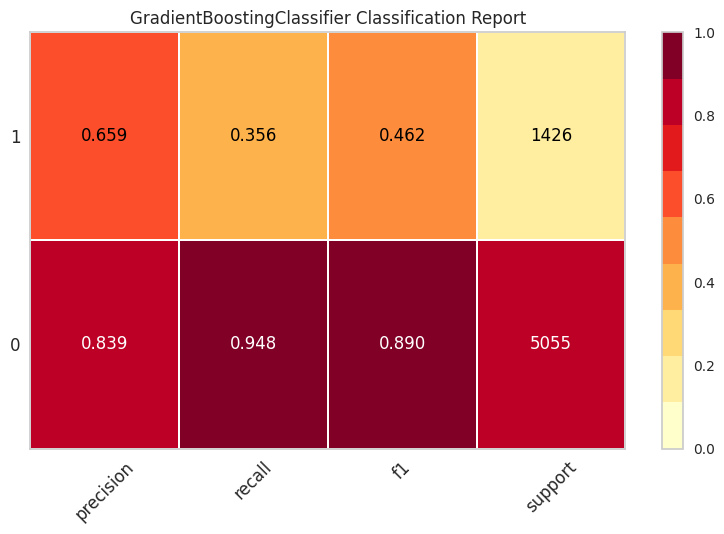

In [31]:
plot_model(model, plot='class_report')     # 分類レポート


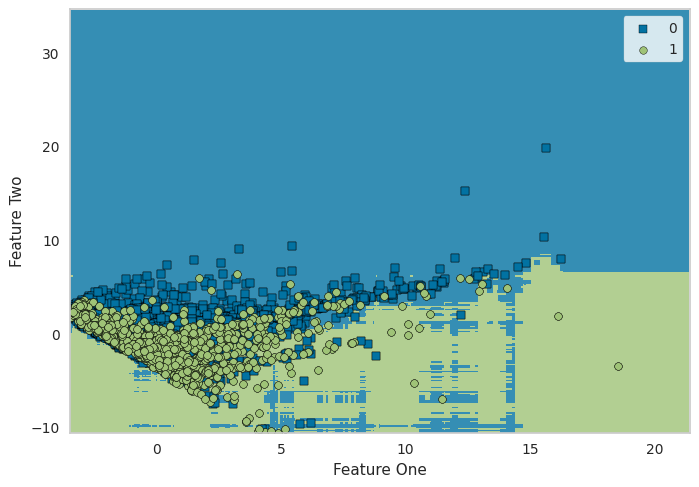

In [32]:
plot_model(model, plot='boundary')         # 決定境界


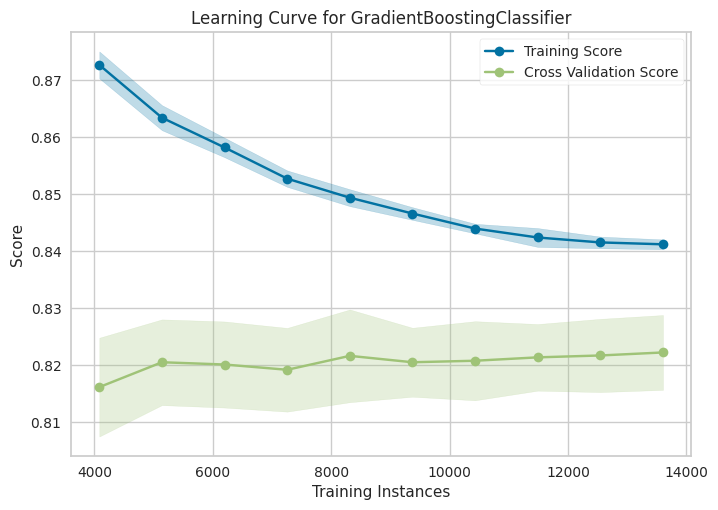

In [34]:
plot_model(model, plot='learning')         # 学習曲線


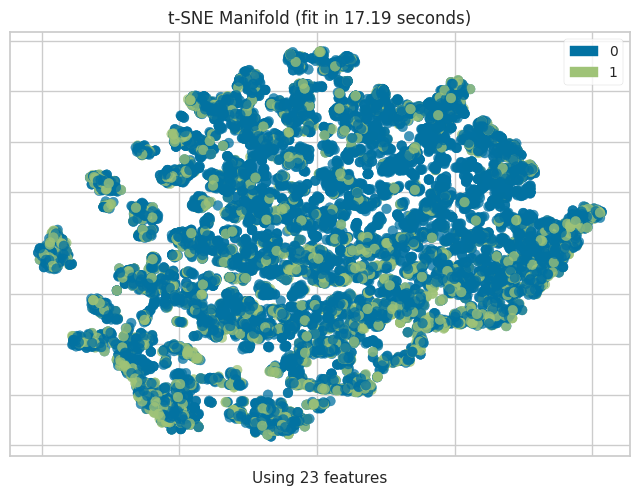

In [35]:
plot_model(model, plot='manifold')         # マニフォールド学習


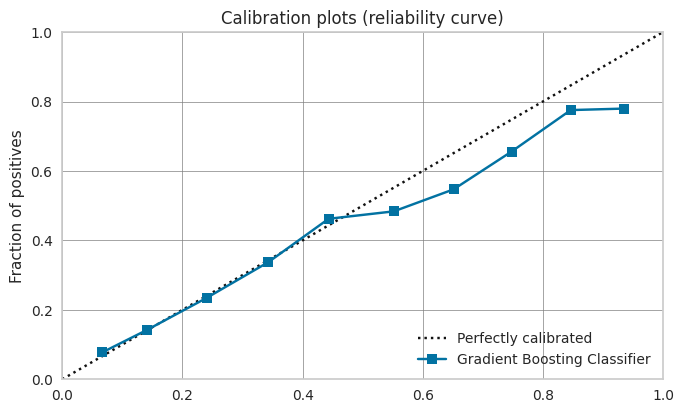

In [36]:
plot_model(model, plot='calibration')      # キャリブレーションカーブ


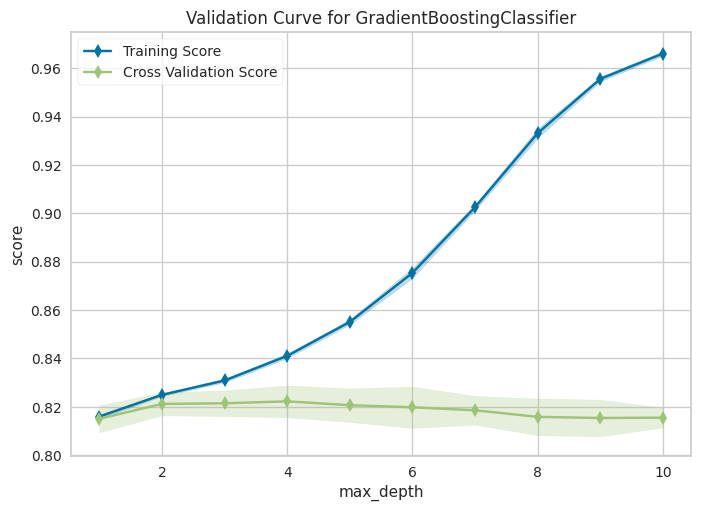

In [37]:
plot_model(model, plot='vc')               # 検証曲線


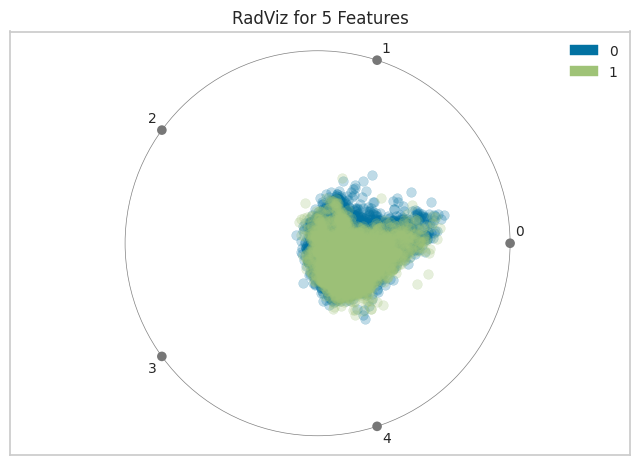

In [38]:
plot_model(model, plot='dimension')        # 次元学習


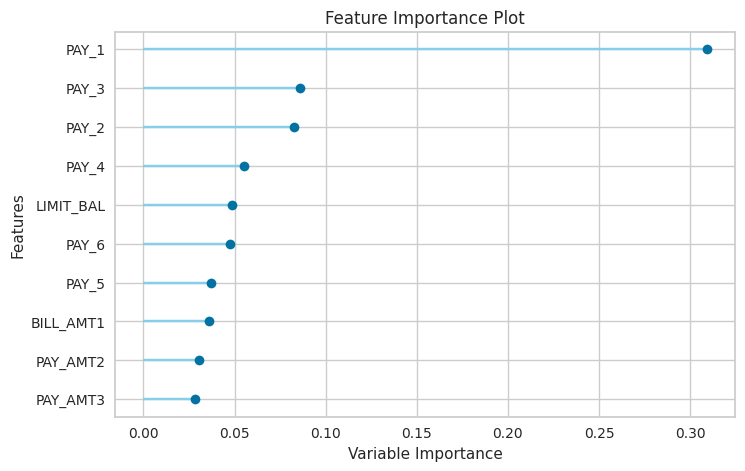

In [39]:
plot_model(model, plot='feature')          # 特徴重要度


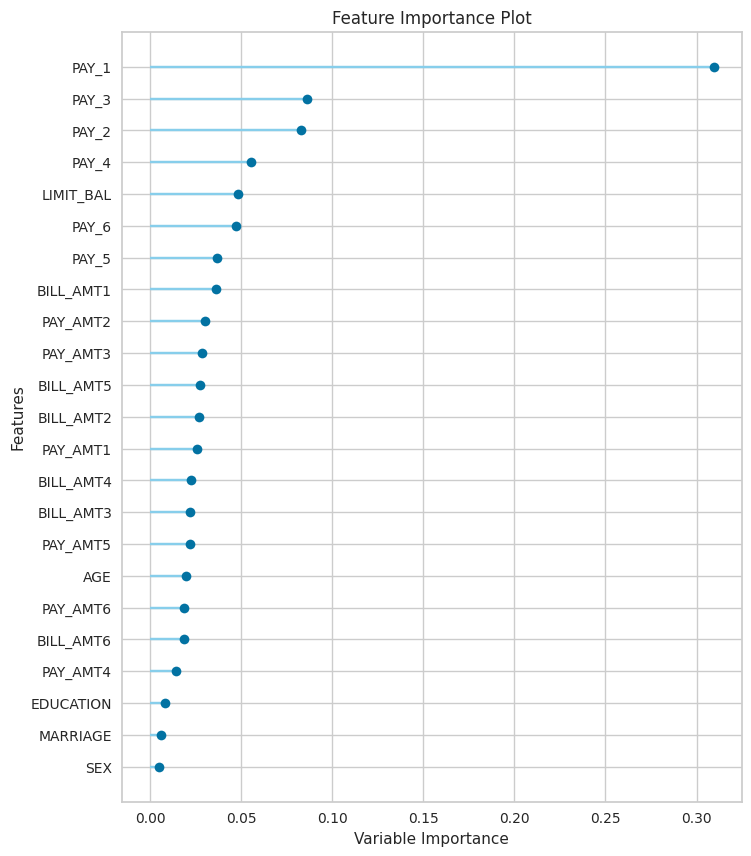

In [40]:
plot_model(model, plot='feature_all')      # 全特徴の重要度


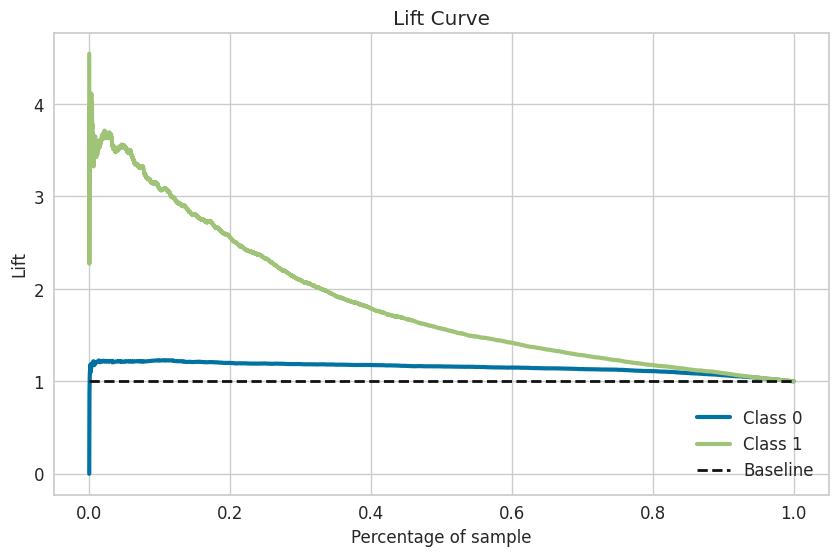

In [42]:
plot_model(model, plot='lift')             # リフトカーブ


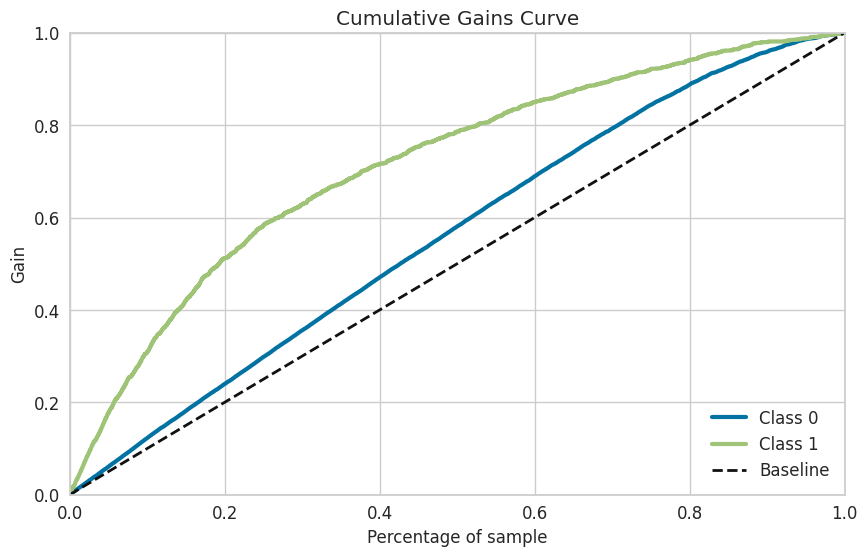

In [43]:
plot_model(model, plot='gain')             # ゲインチャート


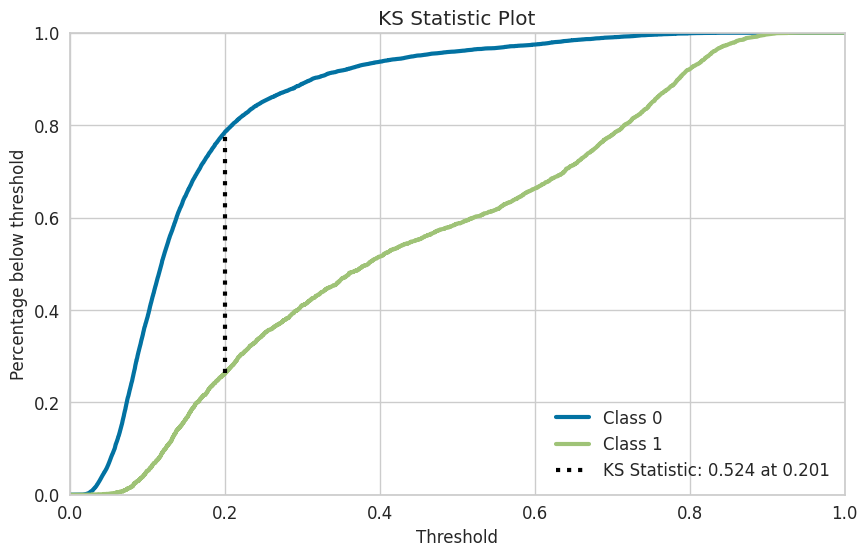

In [45]:
plot_model(model, plot='ks')               # KS統計プロット

In [9]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.7126,0.5385,0.6364,0.5833,0.3361,0.3391
1,0.8387,0.9017,0.6923,0.9000,0.7826,0.6578,0.6722
2,0.8387,0.8846,0.6923,0.9000,0.7826,0.6578,0.6722
3,0.8387,0.8739,0.6154,1.0000,0.7619,0.6501,0.6940
4,0.8387,0.8889,0.6923,0.9000,0.7826,0.6578,0.6722
5,0.7742,0.8728,0.7500,0.6923,0.7200,0.5313,0.5325
6,0.8065,0.8311,0.7500,0.7500,0.7500,0.5921,0.5921
7,0.7419,0.8026,0.6667,0.6667,0.6667,0.4561,0.4561
8,0.8710,0.8947,0.9167,0.7857,0.8462,0.7362,0.7427


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [10]:
#こっちでもモデルの評価可能
evaluate_model(tuned_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
finalized_model = finalize_model(tuned_model)



In [13]:
#予測の実施
predict = predict_model(finalized_model,data=test)

In [14]:
#prediction_labelが予測結果0or1
#prediction_scoreが予想の確度
predict

,pclass,sex,age,sibsp,parch,fare,embarked,prediction_label,prediction_score
id,,,,,,,,,
0,3,male,22.0,1,0,7.250000,S,0,0.6159
1,1,female,38.0,1,0,71.283302,C,1,0.6080
2,3,female,26.0,0,0,7.925000,S,1,0.5400
5,3,male,NaN,0,0,8.458300,Q,0,0.6098
6,1,male,54.0,0,0,51.862499,S,0,0.5446
...,...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.125000,Q,1,0.5142
886,2,male,27.0,0,0,13.000000,S,0,0.6050
887,1,female,19.0,0,0,30.000000,S,1,0.5949


In [17]:
output = predict['prediction_label']

In [18]:
output

id
0      0
1      1
2      1
5      0
6      0
      ..
885    1
886    0
887    1
889    0
890    0
Name: prediction_label, Length: 446, dtype: int64

In [20]:
#indexなしで出力
#このcsvを提出すればよい(sample_submissionを見て形式を確認する)
output.to_csv("output.csv",encoding='utf-8',index = False)